# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import pandas as pd


## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [2]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.98552196 2.22781452 2.29754096 2.16457244 2.43736281 2.26859357
 2.24443223 2.96024682 2.08223399 2.01826838]


In [3]:
def uniform_dist(bottom,ceiling,count):
    x = uniform.rvs(size=count)
    a = bottom
    b = ceiling
    return a + (b-a)*x
    

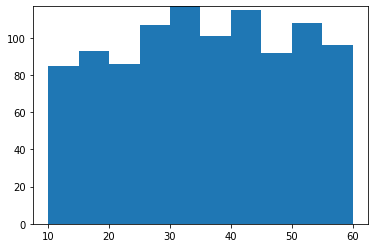

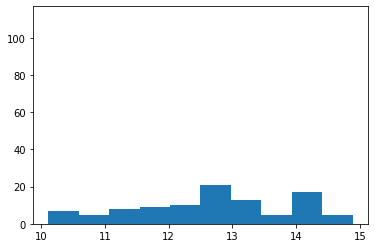

In [4]:
# OPTION 1 without subplots
a = uniform_dist(10,15,100)
b = uniform_dist(10,60,1000)

b_hist = plt.hist(b,bins =10)
plt.ylim((None, b_hist[0].max()))
plt.show()

a_hist = plt.hist(a,bins =10)
plt.ylim((None, b_hist[0].max()))
plt.show()

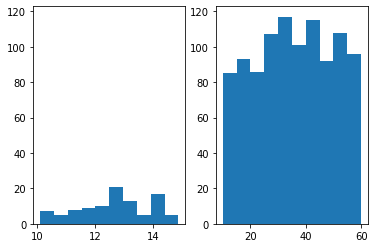

In [5]:
# OPTION 2 SUBPLOTS

# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
ax1 = plt.subplot(1, 2, 1)
plt.hist(a,bins =10)

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1) #OBRIGADA Felipe 🙃
plt.hist(b,bins =10)


plt.show()

How are the two distributions different?

In [6]:
# Not sure, regarding distribution they look quite similar


## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [7]:

'''
- The first two parameters indicate the range [a, b] (measured in standard deviations) 
- loc is the mean (the center of the distribution)
- scale is the standard deviation (how spread the distribution is).
'''
def normal_random(mean,std,size):
    return stats.truncnorm.rvs(-mean, mean, loc=mean, scale=std, size=size) # is it ok to choose the mean as a and b?


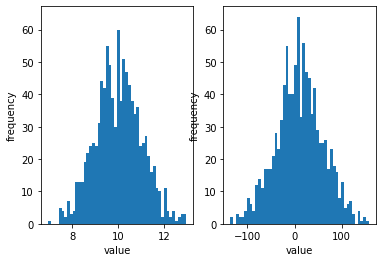

Answer 2 
avarage: 10.012232739770013
std: 1.0032135484603277

Answer 3 
avarage: 10.528146755011003
std: 49.76777313853395


In [9]:

answ_2 = normal_random(10,1,1000)    
answ_3 = normal_random(10,50,1000)

# OPTION 2 SUBPLOTS

# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
# subplot(nrows, ncols, index, **kwargs)
ax1 = plt.subplot(1, 2, 1)
plt.xlabel("value")
plt.ylabel("frequency")
plt.hist(answ_2,bins=50)

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1) #OBRIGADA Felipe 🙃
plt.xlabel("value")
plt.ylabel("frequency")
plt.hist(answ_3,bins=50)

plt.show()

print('Answer 2 \navarage:',answ_2.mean()) 
print('std:',answ_2.std()) 

print('\nAnswer 3 \navarage:',answ_3.mean()) #Is this mean correct?
print('std:',answ_3.std()) 


How are the two distributions different?

In [10]:
'''
Values are more spread out when std is bigger.

'''


'\nValues are more spread out when std is bigger.\n\n'

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:



In [11]:
# your code here
vehicles_df = pd.read_csv('vehicles.csv')
vehicles_df.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


1. Fuel Barrels/Year

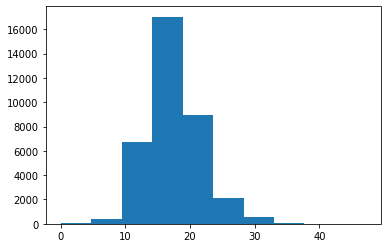

In [12]:
plt.hist(vehicles_df['Fuel Barrels/Year'])
plt.show()

2. CO2 Emission Grams/Mile 

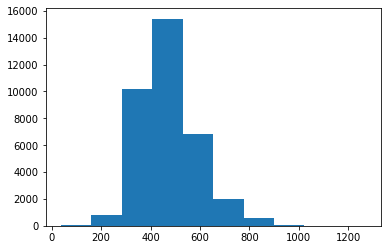

In [13]:
plt.hist(vehicles_df['CO2 Emission Grams/Mile'])
plt.show()

3. Combined MPG

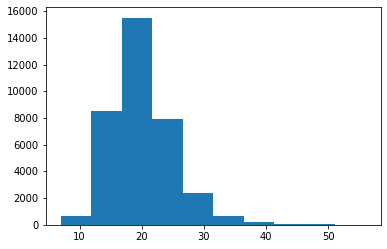

In [14]:
plt.hist(vehicles_df['Combined MPG'])
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [15]:
'''
CO2 Emission Grams/Mile seams to be the closer one to a normal distribution because of the symetry about the mean
'''

'\nCO2 Emission Grams/Mile seams to be the closer one to a normal distribution because of the symetry about the mean\n'

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [63]:
def random_exponential(mean,size):
    return np.random.exponential(scale=mean,size=size)

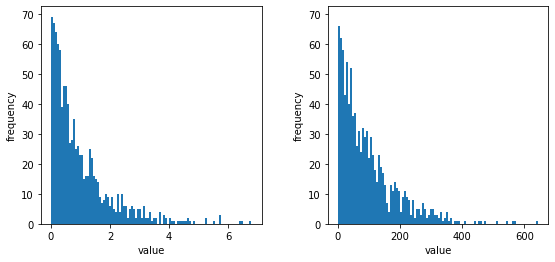

In [64]:
exponential_1 = random_exponential(1,1000)
exponential_2 = random_exponential(100,1000)


ax1 = plt.subplot(1, 2, 1)
plt.xlabel("value")
plt.ylabel("frequency")
# matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.subplots_adjust(wspace=0.3,right=1.3)
plt.hist(exponential_1,bins=100)

ax2 = plt.subplot(1, 2, 2, sharey=ax1) 
plt.xlabel("value")
plt.ylabel("frequency")
plt.hist(exponential_2,bins=100)

plt.show()


How are the two distributions different?

In [ ]:
# your answer here:


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [109]:
mu = 10
t = 15
event_time = 1/mu
event_time

0.1

In [110]:
# All with different results, not sure which one is correct
# OPTION 1 - example from class

exponential = stats.expon(event_time)
probability = exponential.cdf(t)
probability*100

99.99996619256515

In [111]:
# OPTION 2
stats.expon.cdf(p, scale = mu)

0.7768698398515702

In [122]:
# OPTION 3
# Almost there but why do I have an extra 0?
0.1 - event_time*math.exp(-event_time*t)

0.07768698398515703

What is the probability that the customer will spend more than 15 minutes

In [130]:
# OPTION 1
more_then_15 = event_time*math.exp(-event_time*t)
print(more_then_15*10*100,'%')

22.313016014842983 %


In [132]:
# OPTION 2 
print(1-stats.expon.cdf(p, scale = mu),'%')

0.2231301601484298 %
